In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [ ]:
from sklearn.linear_model import LinearRegression


In [3]:
#Read the data
cars = pd.read_csv("/Users/Akshay/Documents/DataScience/ExcelR/Practice_DS/Python/MultiLinearRegression/Cars.csv")
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   MPG     81 non-null     float64
 2   VOL     81 non-null     int64  
 3   SP      81 non-null     float64
 4   WT      81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


In [5]:
#check for missing values
cars.isna().sum()

HP     0
MPG    0
VOL    0
SP     0
WT     0
dtype: int64

In [7]:
cars.isnull().sum()

HP     0
MPG    0
VOL    0
SP     0
WT     0
dtype: int64

# Correlation Matrix

In [8]:
cars.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


# Scatterplot between variables along with histograms

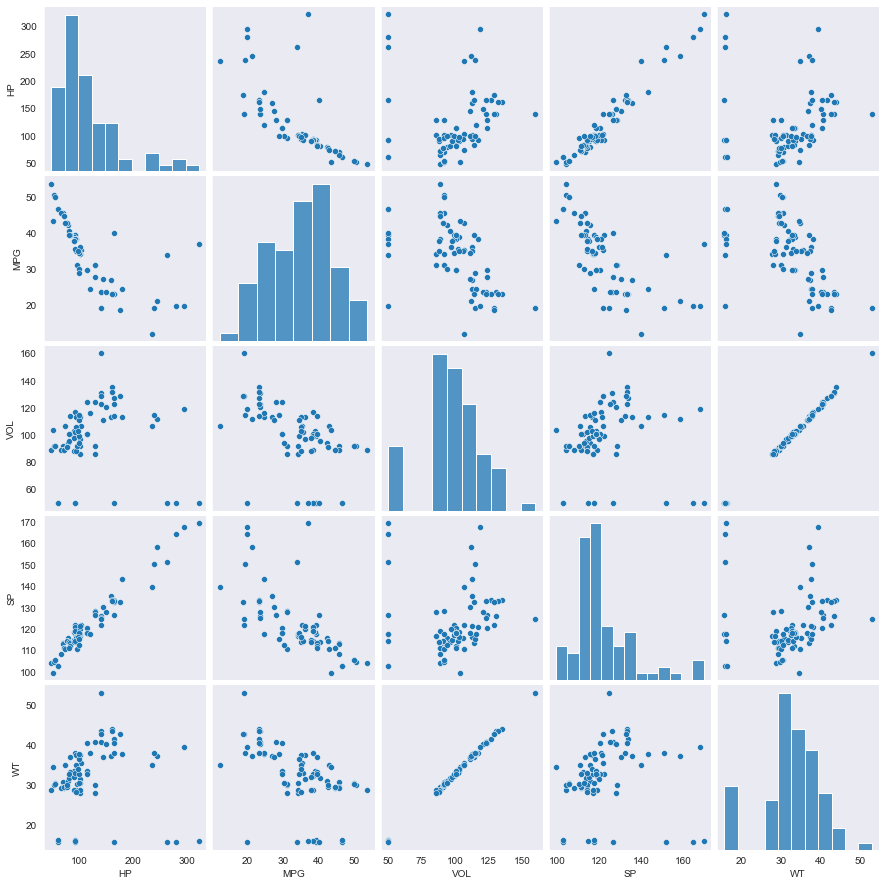

In [14]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='dark')#style can be ticks,darkgrid,white,whitegrid,dark
sns.pairplot(cars)


# Preparing a model

In [15]:
#Build model
#import statsmodels.formula.api as smf 
#mpg= b0+(b1*wt)+(b2*vol)+(b3*sp)+(b4*hp)
model = smf.ols('MPG~WT+VOL+SP+HP',data=cars).fit()

In [16]:
dir(model)

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abat_diagonal',
 '_cache',
 '_data_attr',
 '_data_in_cache',
 '_get_robustcov_results',
 '_is_nested',
 '_use_t',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 'get_influence',
 'get_prediction',
 'get_robustcov_results',
 'initialize',
 'k

In [17]:
#Coefficients
model.params

Intercept    30.677336
WT            0.400574
VOL          -0.336051
SP            0.395627
HP           -0.205444
dtype: float64

In [18]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept    2.058841
WT           0.236541
VOL         -0.590970
SP           2.499880
HP          -5.238735
dtype: float64 
 Intercept    0.042936
WT           0.813649
VOL          0.556294
SP           0.014579
HP           0.000001
dtype: float64


In [19]:
#R squared values
(model.rsquared,model.rsquared_adj)
# rsquared_adj - tells when we add new feature/column to the above ols eq(under x ) if it is reduced than previous then we can discard that if it is increased then we can add that.Mainly tells about impacting/significance of the value

(0.7705372737359841, 0.7584602881431413)

# Simple Linear Regression Models
As the vol and weight p_value is grater than 0.05 in regression model but in coreelation matrix the r2 is strong btwn them so some issue we need to investife further by considering each variable as a simple regression model and we also know tht these two are imp variables for determing MPG (as per the domain knowledge)

In [20]:
ml_v=smf.ols('MPG~VOL',data = cars).fit()  
#t and p-Values
print(ml_v.tvalues, '\n', ml_v.pvalues)  

Intercept    14.106056
VOL          -5.541400
dtype: float64 
 Intercept    2.753815e-23
VOL          3.822819e-07
dtype: float64


In [21]:
ml_w=smf.ols('MPG~WT',data = cars).fit()  
print(ml_w.tvalues, '\n', ml_w.pvalues)  

Intercept    14.248923
WT           -5.508067
dtype: float64 
 Intercept    1.550788e-23
WT           4.383467e-07
dtype: float64


In [22]:
ml_wv=smf.ols('MPG~WT+VOL',data = cars).fit()  
print(ml_wv.tvalues, '\n', ml_wv.pvalues) 
#When both are run sepertely as above the p_value is correct but togethr they impact the model so we need to drop anyone

Intercept    12.545736
WT            0.489876
VOL          -0.709604
dtype: float64 
 Intercept    2.141975e-20
WT           6.255966e-01
VOL          4.800657e-01
dtype: float64


# Calculating VIF

In [23]:
rsq_hp = smf.ols('HP~WT+VOL+SP',data=cars).fit().rsquared  
vif_hp = 1/(1-rsq_hp) # 16.33

rsq_wt = smf.ols('WT~HP+VOL+SP',data=cars).fit().rsquared  
vif_wt = 1/(1-rsq_wt) # 564.98

rsq_vol = smf.ols('VOL~WT+SP+HP',data=cars).fit().rsquared  
vif_vol = 1/(1-rsq_vol) #  564.84

rsq_sp = smf.ols('SP~WT+VOL+HP',data=cars).fit().rsquared  
vif_sp = 1/(1-rsq_sp) #  16.35

# Storing vif values in a data frame
d1 = {'Variables':['Hp','WT','VOL','SP'],'VIF':[vif_hp,vif_wt,vif_vol,vif_sp]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame
#WT and Vol has vif>20 so we need to discard any one(20 as per the std value)

,Variables,VIF
0,Hp,19.926589
1,WT,639.533818
2,VOL,638.806084
3,SP,20.007639


# Residual Analysis/Model Validation

## Test for Normality of Residuals (Q-Q Plot)

In [24]:
model.resid# error id(y-ycap= actual - predicted value ex:(53.7006 - (30.673+(49*-.205)+(28.762*.4005)+(89*-0.3361)+(104.185*.3956)))

0     10.258747
1      7.624608
2      7.734060
3      3.157963
4      8.331584
        ...    
76    15.617904
77     1.298838
78     7.863547
79     7.517122
80    -3.458218
Length: 81, dtype: float64

In [26]:
model.params

Intercept    30.677336
WT            0.400574
VOL          -0.336051
SP            0.395627
HP           -0.205444
dtype: float64

In [27]:
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


line{None, “45”, “s”, “r”, “q”}
Options for the reference line to which the data is compared:

“45” - 45-degree line

“s” - standardized line, the expected order statistics are scaled by the standard deviation of the given sample and have the mean added to them

“r” - A regression line is fit

“q” - A line is fit through the quartiles.

None - by default no reference line is added to the plot.

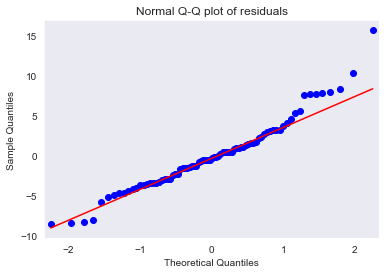

In [35]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line,line{None, “45”, “s”, “r”, “q”}
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [42]:
list(np.where(model.resid>10))# gives the list of all error values whoes value is graeter than 10 as belwo 0,76 index value has errro value >10

[array([ 0, 76], dtype=int64)]

## Residual Plot for Homoscedasticity

In [43]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

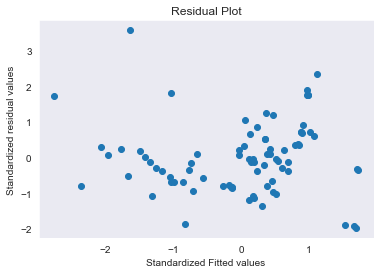

In [44]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

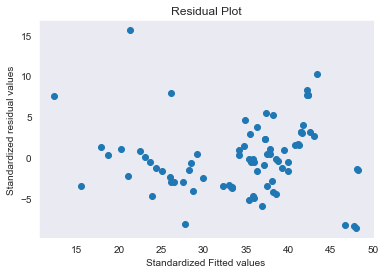

In [45]:
#without standardization
plt.scatter(model.fittedvalues,
            model.resid)

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

## Residual Vs Regressors

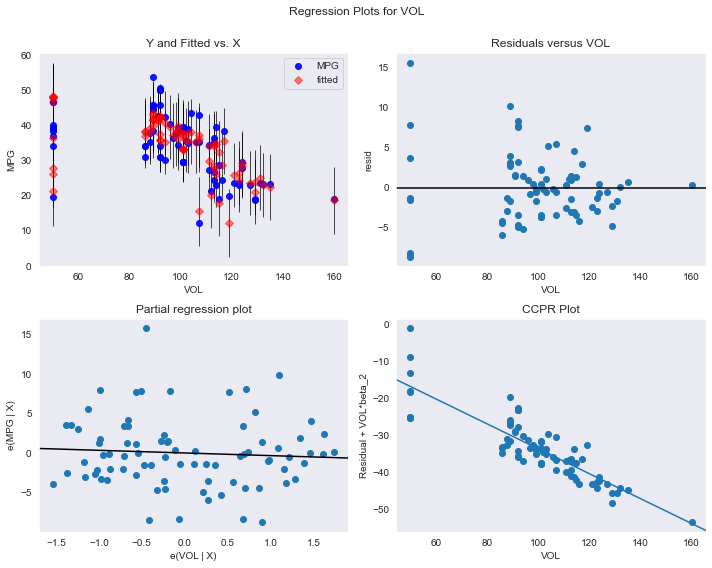

In [46]:
fig = plt.figure(figsize=(10,8))
fig = sm.graphics.plot_regress_exog(model, "VOL", fig=fig)
plt.show()

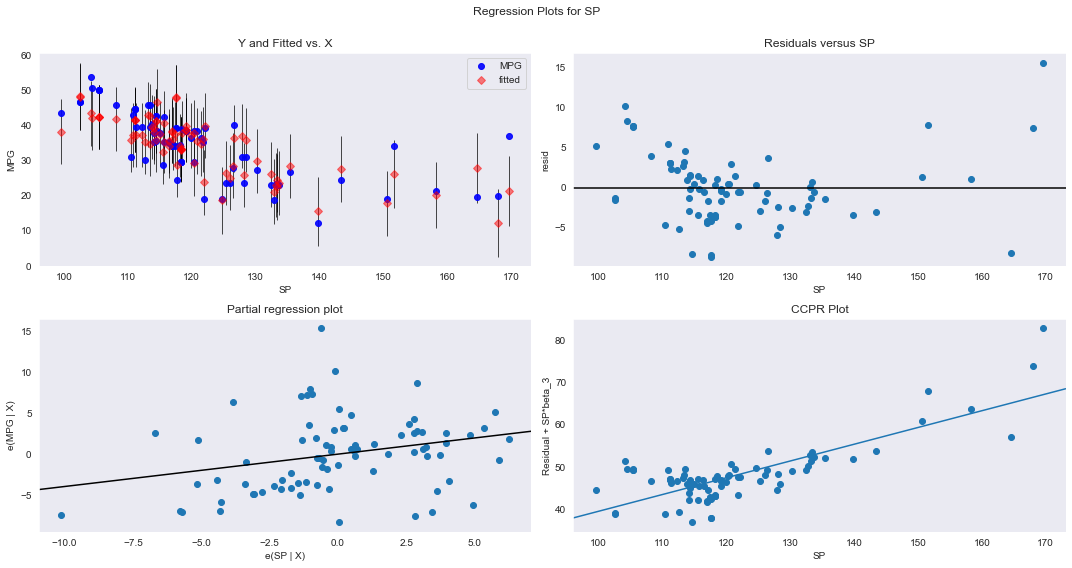

In [47]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "SP", fig=fig)
plt.show()

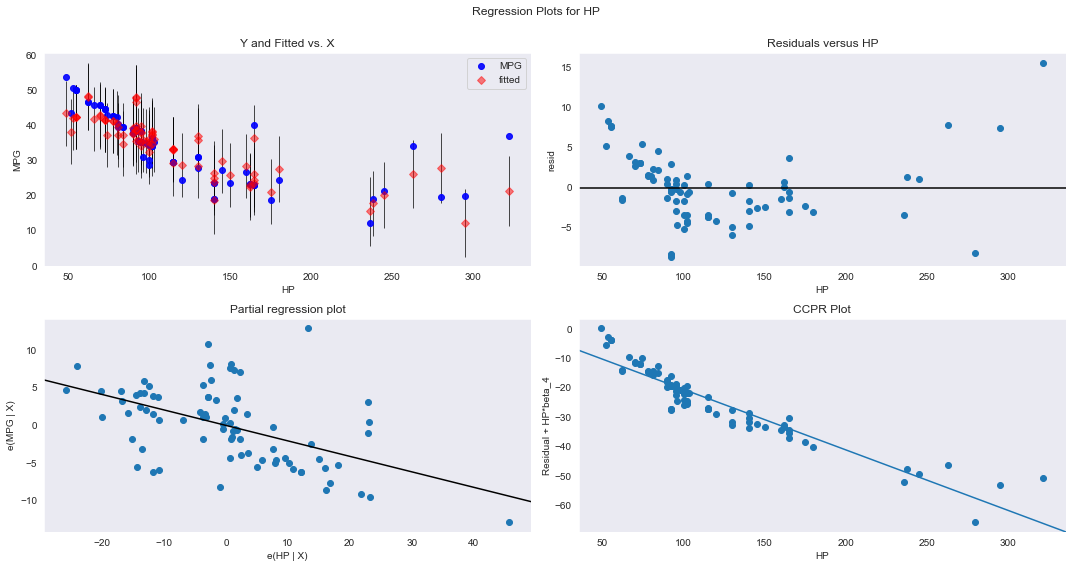

In [48]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "HP", fig=fig)
plt.show()

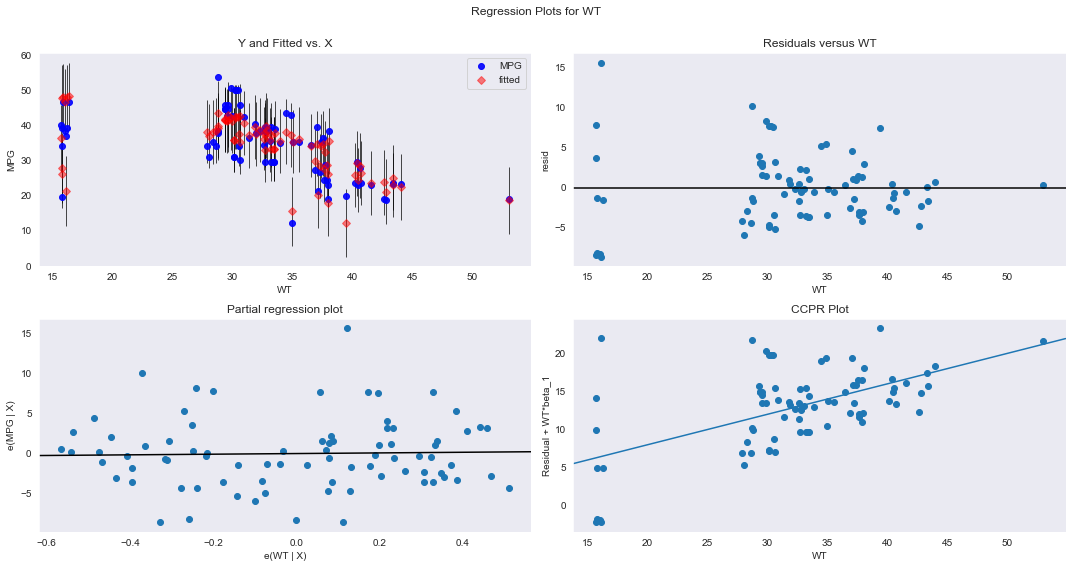

In [49]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "WT", fig=fig)
plt.show()

# Model Deletion Diagnostics

## Detecting Influencers/Outliers

## Cook’s Distance

In [52]:
model_influence = model.get_influence()
#_ is a temporary place holder for a variable which we dont use it or need to throw away
(c, _) = model_influence.cooks_distance# _ means second o/p is not stored and no memory is allocated i.e cooks_distance gives two o/p one is cooks value and second is p_value and we dont need p value so no memory will be allocated by using_

In [51]:
model_influence.cooks_distance

(array([6.04797739e-02, 2.80207825e-02, 1.84833331e-02, 7.27752720e-03,
        2.96019879e-02, 4.81278004e-03, 2.07405847e-02, 2.55586700e-03,
        4.05692942e-03, 7.54004910e-04, 2.97311924e-03, 8.72887201e-02,
        3.32487183e-04, 3.06716174e-03, 5.27414633e-03, 5.29293219e-03,
        1.16531605e-03, 7.63273362e-02, 6.47114749e-04, 5.79692771e-04,
        1.13359020e-05, 1.03054091e-02, 1.53244850e-04, 3.10730928e-04,
        1.49488694e-03, 5.85742198e-02, 1.00598054e-02, 6.55605611e-05,
        3.30438001e-02, 1.81295962e-04, 1.33814932e-02, 9.97753151e-04,
        4.02570308e-04, 1.13711936e-03, 2.85608656e-03, 4.41332141e-05,
        3.27632348e-04, 4.70959014e-03, 1.21704644e-02, 8.96948188e-03,
        2.35324656e-04, 9.75839299e-06, 4.49488700e-03, 4.48437031e-03,
        1.02593360e-05, 4.75617324e-04, 2.22586830e-05, 4.66305687e-05,
        1.27051048e-02, 5.33728062e-03, 2.98638028e-03, 5.00671925e-03,
        1.29659561e-04, 1.14393086e-02, 8.61438068e-04, 2.466954

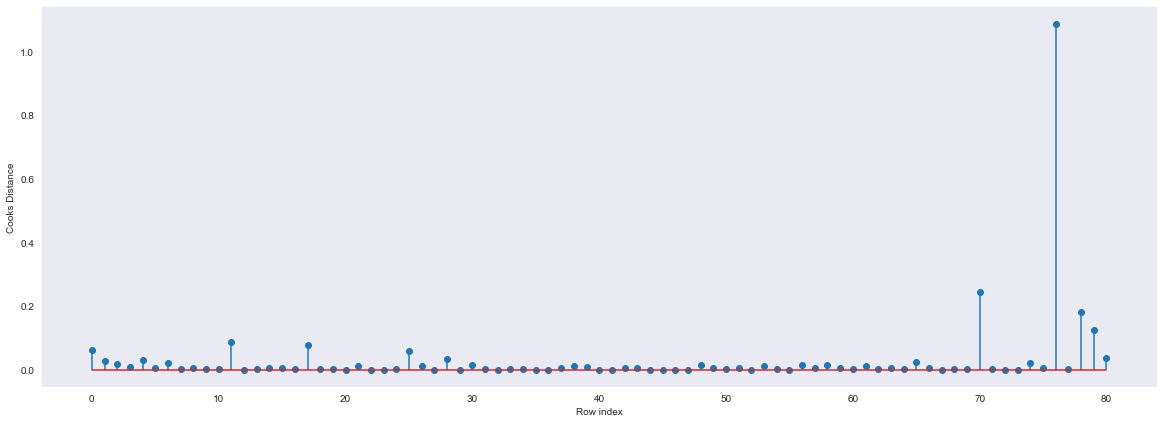

In [55]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(cars)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [53]:
len(cars)

81

In [56]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(76, 1.0865193998179867)

## High Influence points

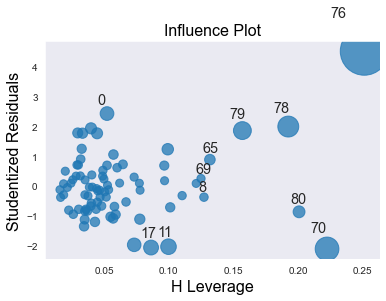

In [57]:
#from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [59]:
k = cars.shape[1]
n = cars.shape[0]
leverage_cutoff = 3*((k + 1)/n)

In [58]:
cars.shape

(81, 5)

In [60]:
leverage_cutoff

0.2222222222222222

#### From the above plot, it is evident that data point 70 and 76 are the influencers

In [66]:
cars[cars.index.isin([70, 76])]#isin is the func that checks the index value in the cars


,HP,MPG,VOL,SP,WT
70,280,19.678507,50,164.598513,15.823060
76,322,36.900000,50,169.598513,16.132947


In [67]:
#See the differences in HP and other variable values
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


# Improving the model

In [68]:
#Load the data
cars_new = pd.read_csv("Cars.csv")

In [69]:
#Discard the data points which are influencers and reasign the row number (reset_index())
car1=cars_new.drop(cars_new.index[[70,76]],axis=0).reset_index()
car1.tail()

,index,HP,MPG,VOL,SP,WT
74,75,175,18.762837,129,132.864163,42.778219
75,77,238,19.197888,115,150.576579,37.923113
76,78,263,34.000000,50,151.598513,15.769625
77,79,295,19.833733,119,167.944460,39.423099
78,80,236,12.101263,107,139.840817,34.948615


In [70]:
#Drop the original index
car1=car1.drop(['index'],axis=1)

In [71]:
car1.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


# Build Model

In [72]:
#Exclude variable "WT" and generate R-Squared and AIC values
final_ml_V= smf.ols('MPG~VOL+SP+HP',data = car1).fit()

In [73]:
(final_ml_V.rsquared,final_ml_V.aic)# check for the r2 value of this new model and the previous model

(0.8161692010376006, 446.11722639447726)

In [74]:
model.rsquared,final_ml_V.rsquared# r2 incresed as we droped few rows which were influencing to other data points

(0.7705372737359841, 0.8161692010376006)

In [75]:
#Exclude variable "VOL" and generate R-Squared and AIC values
final_ml_W= smf.ols('MPG~WT+SP+HP',data = car1).fit()

In [76]:
(final_ml_W.rsquared,final_ml_W.aic)

(0.8160034320495304, 446.18843235750313)

##### Comparing above R-Square and AIC values, model 'final_ml_V' has high R- square and low AIC value hence include variable 'VOL' so that multi collinearity problem would be resolved.

# Cook’s Distance

In [77]:
model_influence_V = final_ml_V.get_influence()
(c_V, _) = model_influence_V.cooks_distance

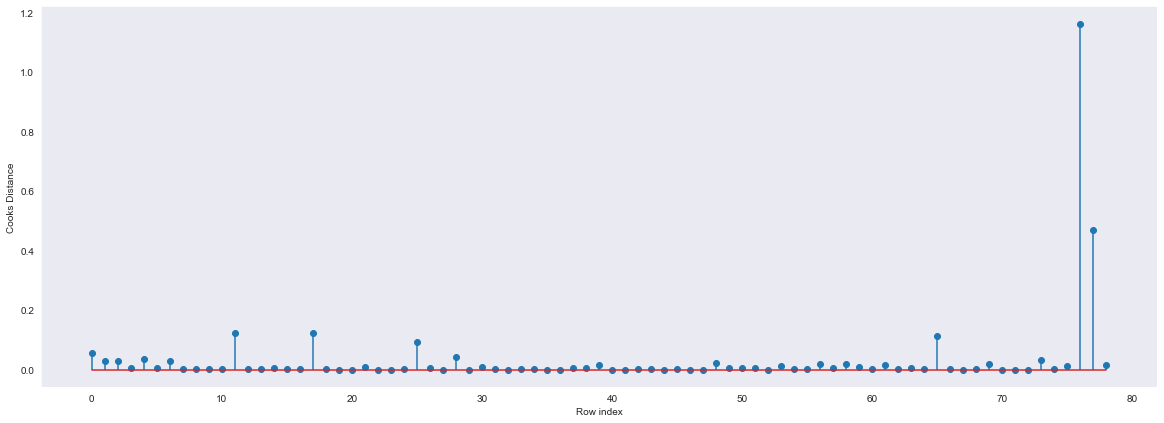

In [78]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(car1)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [79]:
#index of the data points where c is more than .5
(np.argmax(c_V),np.max(c_V))

(76, 1.16293874691354)

In [80]:
#Drop 76 and 77 observations
car2=car1.drop(car1.index[[76,77]],axis=0)

In [81]:
car2

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
72,140,19.086341,160,124.715241,52.997752
73,140,19.086341,129,121.864163,42.618698
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113


In [82]:
#Reset the index and re arrange the row values
car3=car2.reset_index()

In [83]:
car4=car3.drop(['index'],axis=1)

In [84]:
car4.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [85]:
#Build the model on the new data
final_ml_V= smf.ols('MPG~VOL+SP+HP',data = car4).fit()

In [86]:
#Again check for influencers
model_influence_V = final_ml_V.get_influence()
(c_V, _) = model_influence_V.cooks_distance

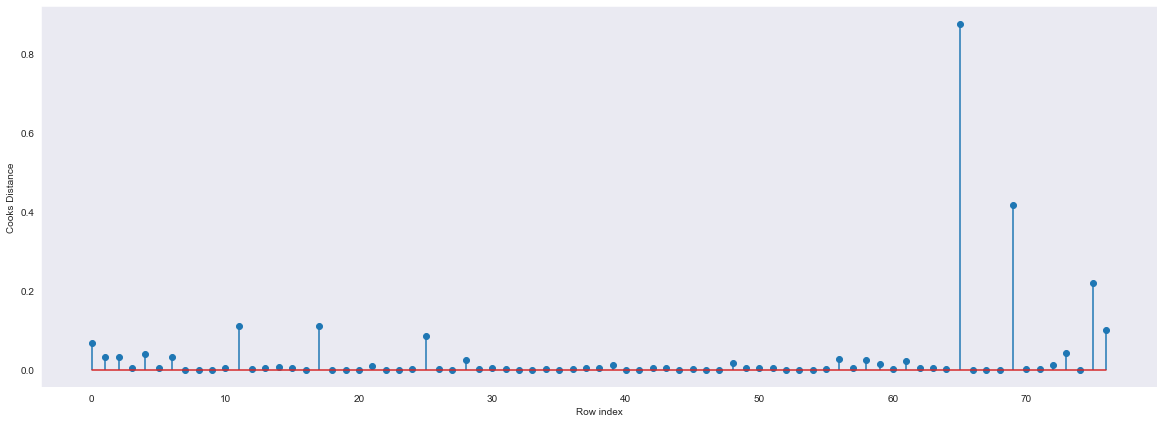

In [87]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(car4)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [88]:
#index of the data points where c is more than .5
(np.argmax(c_V),np.max(c_V))

(65, 0.8774556986296719)

#### Since the value is <1 , we can stop the diagnostic process and finalize the model

In [89]:
#Check the accuracy of the mode
final_ml_V= smf.ols('MPG~VOL+SP+HP',data = car4).fit()

In [90]:
(final_ml_V.rsquared,final_ml_V.aic)

(0.866963611185906, 409.41530627195084)

In [101]:
round(final_ml_V.pvalues,4)

Intercept    0.0287
VOL          0.0000
SP           0.0007
HP           0.0000
dtype: float64

## Predicting for new data

In [91]:
#New data for prediction
new_data=pd.DataFrame({'HP':40,"VOL":95,"SP":102,"WT":35},index=[1])
new_data

,HP,VOL,SP,WT
1,40,95,102,35


In [92]:
final_ml_V.predict(new_data)

1    46.035594
dtype: float64

In [93]:
final_ml_V.predict(cars_new.iloc[0:5,])

0    45.428872
1    43.992392
2    43.992392
3    43.508150
4    44.085858
dtype: float64

In [94]:
pred_y = final_ml_V.predict(cars_new)

In [95]:
pred_y

0     45.428872
1     43.992392
2     43.992392
3     43.508150
4     44.085858
        ...    
76     7.165876
77    12.198598
78    14.908588
79     4.163958
80     9.161202
Length: 81, dtype: float64

In [99]:
car4.tail()

,HP,MPG,VOL,SP,WT
72,140,19.086341,160,124.715241,52.997752
73,140,19.086341,129,121.864163,42.618698
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113
76,236,12.101263,107,139.840817,34.948615


In [97]:
final_ml_V.fittedvalues

0     45.428872
1     43.992392
2     43.992392
3     43.508150
4     44.085858
        ...    
72    20.679595
73    23.666406
74    19.212878
75    12.198598
76     9.161202
Length: 77, dtype: float64